* Reference: __Exploring and measuring non-linear correlations: Copulas, Lightspeed Transportation and Clustering.__ _by_ Marti et al.

## Abstract

Optimal Copula Transport dependence is a unique measure between two random variables that allows measuring the codependence with respect to similarity to the target codependence type.

## Optimal Copula Transport dependence

This description is based on the paper by _Marti et al._ __“Exploring and measuring non-linear correlations: Copulas, Lightspeed Transportation and Clustering.”__  [available here](https://arxiv.org/pdf/1610.09659.pdf).

### Optimal Transport and copulas

As described by Gautier Marti:

“The basic idea of the optimal copula transport dependence measure is rather simple. It relies on leveraging:

- Copulas, which are distributions encoding fully the dependence between random variables.

- A geometrical point of view: Where does the empirical copula stand in the space of copulas? In particular, how far is it from reference copulas such as the Fréchet–Hoeffding copula bounds (copulas associated to comonotone, countermonotone, independent random variables)?”

![image](images/optimal_transport_distance.png)

_Dependence is measured as the relative distance from independence to the nearest target-dependence: comonotonicity or countermonotonicity. ([Blog post by Gautier Marti](https://gmarti.gitlab.io/qfin/2020/06/25/copula-optimal-transport-dependence.html))_

“With this geometric view:

- It is rather easy to extend this novel dependence measure to alternative use cases (e.g. by changing the reference copulas).

- It can also allow to look for specific patterns in the dependence structure (generalization of conditional correlation).

With this optimal copula transport tool, one can look for answers to, for example:

 A) “Which pair of assets having ρ=0.7 correlation has the nearest copula to the Gaussian one?”

 B) “Which pairs of assets are both positively and negatively correlated?”

 C) “Which assets occur extreme variations while those of others are relatively small, and conversely?”

 D) “Which pairs of assets are positively correlated for small variations but uncorrelated otherwise?”

![image](images/target_copulas.png)


_Target copulas (simulated or handcrafted) and their respective nearest copulas which answer questions A,B,C,D. ([Marti et al. 2016](https://arxiv.org/pdf/1610.09659.pdf))_

---

According to the description of the method from [the original paper by Marti et al.](https://arxiv.org/pdf/1610.09659.pdf):

The idea of the approach is to "target specific dependence patterns and ignore others. We want to target dependence
which are relevant to such or such problem, and forget about the dependence which are not in the scope of the problems
at hand, or even worse which may be spurious associations (pure chance or artifacts in the data)."

The proposed codependence coefficient "can be parameterized by a set of target-dependences, and a set
of forget-dependences. Sets of target and forget dependences can be built using expert hypotheses,
or by leveraging the centers of clusters resulting from an exploratory clustering of the pairwise dependences.
To achieve this goal, we will leverage three tools: copulas, optimal transportation, and clustering."

"Optimal transport is based on the underlying theory of the Earth Mover’s Distance. Until very recently,
optimal transportation distances between distributions were not deemed relevant for machine learning applications
since the best computational cost known was super-cubic to the number of bins used for discretizing the
distribution supports which grows itself exponentially with the dimension. A mere distance evaluation
could take several seconds!"

"Copulas and optimal transportation are not yet mainstream tools, but they have recently gained attention
in machine learning, and several copula-based dependence measures have been proposed for improving
feature selection methods".

"Copulas are functions that couple multivariate distribution functions to their univariate marginal distribution functions".

In this implementation, only bivariate copulas are considered, as higher dimensions would cost a high computational burden.
But most of the results and the methodology presented hold in the multivariate setting.

 **Theorem 1 (Sklar’s Theorem)** Let $X = (X_i, X_j)$ be  a random  vector with  a joint
    cumulative distribution function $F$ , and having continuous marginal cumulative
    distribution functions $F_i, F_j$ respectively. Then, there exists a unique
    distribution $C$ such that $F(X_i, X_j) = C(F_i(X_i), F_j(X_j))$ .
    $C$ , the copula of $X$ , is the bivariate distribution of uniform
    marginals $U_i, U_j := F_i(X_i), F_j(X_j)$

"Copulas are central for studying the dependence between random variables: their uniform marginals
jointly encode all the dependence. They allow to study scale-free measures of dependence and are invariant
to monotonous transformations of the variables. Some copulas play a major role in the measure of dependence,
namely $\mathcal{W}$ and $\mathcal{M}$ the Frechet-Hoeffding copula bounds, and the independence
copula $\Pi (u_i,u_j) = u_i u_j$ ".

![image](images/dependence_copulas.png)

_Copulas measure (left column) and cumulative distribution function (right column) heatmaps for negative dependence (first row), independence (second row), i.e. the uniform distribution over $[0, 1]^2$, and positive dependence (third row) ([Marti et al. 2016](https://arxiv.org/pdf/1610.09659.pdf))_

**Proposition 1 (Frechet-Hoeffding copula bounds)** For any copula $C: [0, 1]^2 \rightarrow [0, 1]$ and any $(u_i, u_j) \in [0, 1]^2$ the following bounds hold:

$$\mathcal{W} (u_i, u_j) \le C(u_i, u_j) \le \mathcal{M} (u_i, u_j)$$

where $\mathcal{W} (u_i, u_j) = max \{u_i + u_j − 1, 0 \}$ is the copula for countermonotonic random variables and $\mathcal{M} (u_i, u_j) = min \{ u_i, u_j \}$ is the copula for comonotonic random variables.

"Notice that when working with empirical data, we do not know a priori the margins
$F_i$ for applying the probability integral transform $U_i := F_i(X_i)$ . Deheuvels has introduced a
practical estimator for the uniform margins and the underlying copula, the empirical copula transform".

**Definition 1 (Empirical Copula Transform)** Let $(X^t_i, X^t_j), t = 1, ..., T$ , be $T$ observations
    from a random vector $(X_i, X_j)$ with continuous margins. Since one cannot directly obtain the corresponding
    copula observations $(U^t_i, U^t_j) := (F_i(X^t_i), F_j(X^t_j))$ , where $t = 1, ..., T$ , without
    knowing a priori $F_i$ , one can instead estimate the empirical
    margins $F^T_i(x) = \frac{1}{T} \sum^T_{t=1} I(X^t_i \le x)$ , to obtain the $T$ empirical
    observations $(\widetilde{U}^t_i, \widetilde{U}^t_j) := (F^T_i(X^t_i), F^T_j(X^t_j))$ . Equivalently,
    since $U^t_i = R^t_i / T, R^t_i$ being the rank of observation $X^t_i$ , the empirical copula
    transform can be considered as the normalized rank transform.

"The idea of optimal transport is intuitive. It was first formulated by Gaspard Monge in 1781 as a problem to
efficiently level the ground: Given that work is measured by the distance multiplied by the amount of dirt
displaced, what is the minimum amount of work required to level the ground? Optimal transport plans and distances
give the answer to this problem. In practice, empirical distributions can be represented by histograms.

Let $r, c$ be two histograms in the probability simplex $\sum_m = \{x \in R^m_+ : x^T 1_m = 1\}$ .
Let $U(r, c) = \{ P \in R^{m \times m}_+ | P1_m = r, P^T 1_m = c\}$ be the transportation polytope
of $r$ and $c$ , that is the set containing all possible transport plans between $r$ and $c$ ".

**Definition 2 (Optimal Transport)** Given a $m \times m$ cost matrix $M$, the cost of mapping $r$ to
    $c$ using a transportation matrix $P$ can be quantified as $\langle P, M \rangle _F$ , where $\langle \cdot, \cdot \rangle _F$ is
    the Frobenius dot-product. The optimal transport between $r$ and $c$ given transportation cost
    $M$ is thus:

$$d_M(r, c) := min_{P \in U (r, c)} \langle P, M \rangle _F$$

"Whenever $M$ belongs to the cone of distance matrices, the optimum of the transportation problem
$d_M(r, c)$ is itself a distance.

Using the optimal transport distance between copulas, we now propose a dependence coefficient which is parameterized
by two sets of copulas: target copulas and forget copulas".

**Definition 3 (Target/Forget Dependence Coefficient)** Let ${C^-_l}_l$ be the set of forget-dependence copulas.
    Let ${C^+_k}_k$ be the set of target-dependence copulas. Let $C$ be the copula of $(X_i, X_j)$ .
    Let $d_M$ be an optimal transport distance parameterized by a ground metric $M$ . We define
    the Target/Forget Dependence Coefficient as:

$$TFDC(X_i, X_j; {C^+_k}_k, {C^-_l}_l) := \frac{min_l d_M(C^-_l, C)}{min_l d_M(C^-_l, C) + min_k d_M(C, C^+_k)} \in [0, 1]$$

"Using this definition, we obtain:

$$TFDC (X_i, X_j; {C:+_k}_k, {C:-_l}_l) = 0 \Leftrightarrow C \in {C^-_l}_l$$

$$TFDC(X_i ,X_j; {C^+_k}_k, {C^-_l}_l) = 1 \Leftrightarrow C \in {C^+_k}_k$$

It is known by risk managers how dangerous it can be to rely solely on a correlation coefficient
to measure dependence. That is why we have proposed a novel approach to explore, summarize and measure the
pairwise correlations which exist between variables in a dataset. The experiments show the benefits of the
proposed method: It allows to highlight the various dependence patterns that can be found between financial
time series, which strongly depart from the Gaussian copula widely used in financial engineering.
Though answering dependence queries as briefly outlined is still an art, we plan to develop a rich language so
that a user can formulate complex questions about dependence, which will be automatically translated into
copulas in order to let the methodology provide these questions accurate answers".

---

## Usage of the algorithms

##### **Warning!** Optimal Copula Transport dependence is computationally heavy, so calculating the codependence matrix may take some time.

This part shows how the Optimal Copula Transport dependence can be used to measure codependence between a set of stocks

In [1]:
import arbitragelab as al
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset of stocks
stocks = pd.read_csv('../../Sample-Data/stock_prices.csv')
stocks.set_index('Date', inplace=True)
stocks.index = pd.to_datetime(stocks.index)

# Taking first 10 stocks for better output visualization
stocks = stocks.iloc[:,0:10]
stocks.head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
Date,,,,,,,,,,
2008-01-02,49.273335,35.389999,106.639999,52.919998,78.220001,87.629997,37.939999,47.759998,41.299999,79.500000
2008-01-03,49.716667,35.290001,107.000000,53.119999,78.349998,87.809998,37.919998,48.060001,42.049999,80.440002
2008-01-04,48.223331,34.599998,106.970001,51.759998,76.570000,88.040001,36.990002,46.919998,40.779999,77.500000
2008-01-07,48.576668,34.630001,106.949997,51.439999,76.650002,88.199997,37.259998,47.060001,40.220001,77.199997
2008-01-08,48.200001,34.389999,107.029999,51.320000,76.220001,88.389999,36.970001,46.400002,39.599998,75.849998


In [3]:
# Calculating returns of a given dataset of stocks
stocks_returns = stocks.pct_change()[1:]
stocks_returns.iloc[:,0:10].head()

,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
Date,,,,,,,,,,
2008-01-03,0.008997,-0.002826,0.003376,0.003779,0.001662,0.002054,-0.000527,0.006281,0.018160,0.011824
2008-01-04,-0.030037,-0.019552,-0.000280,-0.025602,-0.022719,0.002619,-0.024525,-0.023720,-0.030202,-0.036549
2008-01-07,0.007327,0.000867,-0.000187,-0.006182,0.001045,0.001817,0.007299,0.002984,-0.013732,-0.003871
2008-01-08,-0.007754,-0.006930,0.000748,-0.002333,-0.005610,0.002154,-0.007783,-0.014025,-0.015415,-0.017487
2008-01-09,0.032780,0.003199,-0.000747,0.021824,0.007216,-0.001584,0.002975,0.000431,0.006313,0.013184


In [4]:
# Calculating Optimal Copula Transport dependence using a comonotone target copula
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='comonotonicity')
print('Optimal Copula Transport dependence between EEM and EWG using a comonotone target copula is: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using a comonotone target copula is:  0.6462059881325453


In [5]:
# Calculating Optimal Copula Transport dependence using a countermonotone target copula
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='countermonotonicity')
print('Optimal Copula Transport dependence between EEM and EWG using a countermonotone target copula is: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using a countermonotone target copula is:  0.13463406216130724


In [6]:
# Calculating Optimal Copula Transport dependence using a Gaussian target copula with ρ=0.5
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='gaussian', gaussian_corr=0.5)
print('Optimal Copula Transport dependence between EEM and EWG using a Gaussian target copula with ρ=0.5 is: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using a Gaussian target copula with ρ=0.5 is:  0.8302875940098491


In [7]:
# Calculating Optimal Copula Transport dependence using a positive and negative correlation target copula
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='positive_negative')
print('Optimal Copula Transport dependence between EEM and EWG using a positive and negative correlation target copula is: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using a positive and negative correlation target copula is:  0.3713688177052894


In [8]:
# Calculating Optimal Copula Transport dependence using a target copula wheree element has extreme variations and the second has small variations
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='different_variations')
print('Optimal Copula Transport dependence between EEM and EWG using a arget copula with one element has extreme variations and the second has small variations is: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using a arget copula with one element has extreme variations and the second has small variations is:  0.071534141997184


In [9]:
# Calculating Optimal Copula Transport dependence using a Gaussian target copula with elements being positively correlated for small variations but uncorrelated otherwise
ot_dist = al.codependence.optimal_transport_dependence(stocks_returns['EEM'], stocks_returns['EWG'], target_dependence='small_variations', var_threshold=0.2)
print('Optimal Copula Transport dependence between EEM and EWG using elements being positively correlated for small variations but uncorrelated otherwise: ', ot_dist)

Optimal Copula Transport dependence between EEM and EWG using elements being positively correlated for small variations but uncorrelated otherwise:  0.26848497093560353


These codependence measures can also be used on the whole dataframes, the results will be codependence matrices.

In [10]:
# Calculating Optimal Copula Transport dependence between all stocks using a comonotone target copula
ot_matrix_comonotone = al.codependence.get_dependence_matrix(stocks_returns, dependence_method='optimal_transport', target_dependence='comonotonicity')

print('Optimal Copula Transport dependence matrix using a comonotone target copula:')
ot_matrix_comonotone

Optimal Copula Transport dependence matrix using a comonotone target copula:


,EEM,EWG,TIP,EWJ,EFA,IEF,EWQ,EWU,XLB,XLE
EEM,0.999995,0.665204,0.019153,0.468521,0.761082,0.053294,0.653831,0.678253,0.629498,0.569396
EWG,0.665204,0.999994,0.018817,0.439932,0.897176,0.052487,0.923851,0.761925,0.586487,0.468732
TIP,0.019153,0.018817,0.999992,0.018453,0.019886,0.621934,0.017302,0.014566,0.016836,0.018908
EWJ,0.468521,0.439932,0.018453,0.999931,0.702380,0.038658,0.481594,0.465823,0.371374,0.314936
EFA,0.761082,0.897176,0.019886,0.702380,0.999995,0.048805,0.931952,0.894228,0.643953,0.582319
IEF,0.053294,0.052487,0.621934,0.038658,0.048805,0.999995,0.052628,0.048880,0.059184,0.048113
EWQ,0.653831,0.923851,0.017302,0.481594,0.931952,0.052628,0.999992,0.794387,0.588106,0.505904
EWU,0.678253,0.761925,0.014566,0.465823,0.894228,0.048880,0.794387,0.999987,0.617651,0.531514
XLB,0.629498,0.586487,0.016836,0.371374,0.643953,0.059184,0.588106,0.617651,0.999992,0.672828
XLE,0.569396,0.468732,0.018908,0.314936,0.582319,0.048113,0.505904,0.531514,0.672828,0.999995


In [11]:
# Calculating Optimal Copula Transport dependence between all stocks using a Gaussian target copula with ρ=0.5
ot_matrix_gaussian = al.codependence.get_dependence_matrix(stocks_returns, dependence_method='optimal_transport', target_dependence='gaussian', gaussian_corr=0.5)

# Calculating Optimal Copula Transport dependence between all stocks using a positive and negative correlation target copula
ot_matrix_positive_negative = al.codependence.get_dependence_matrix(stocks_returns, dependence_method='optimal_transport', target_dependence='positive_negative')

# Calculating Optimal Copula Transport dependencee between all stocks using a target copula where one element has extreme variations and the second has small variations
ot_matrix_diffvar = al.codependence.get_dependence_matrix(stocks_returns, dependence_method='optimal_transport', target_dependence='different_variations')

# Calculating Optimal Copula Transport dependence between all stocks using a Gaussian target copula with elements being positively correlated for small variations but uncorrelated otherwise
ot_matrix_diffvar = al.codependence.get_dependence_matrix(stocks_returns, dependence_method='optimal_transport', target_dependence='small_variations', var_threshold=0.2)

### Heatmap of Optimal Copula Transport dependence using a comonotone target copula

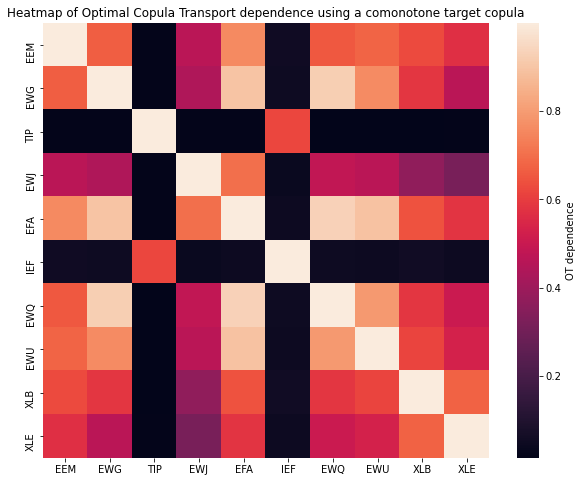

In [12]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(ot_matrix_comonotone, ax = ax, cbar_kws={'label': 'OT dependence'})

ax.set_title('Heatmap of Optimal Copula Transport dependence using a comonotone target copula')
plt.show()

### Heatmap of Optimal Copula Transport dependence using a Gaussian target copula with ρ=0.5

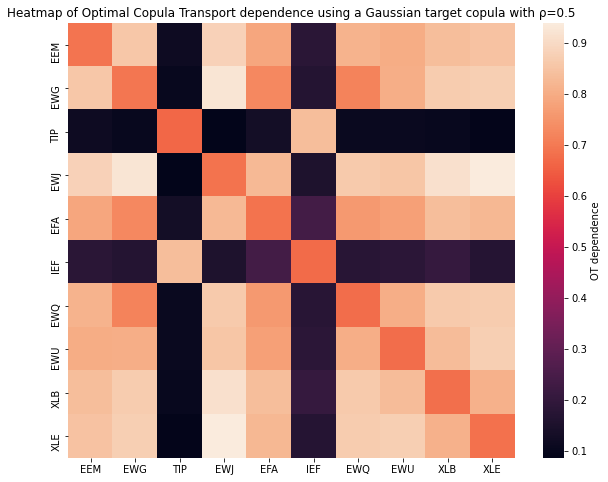

In [13]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ot_matrix_gaussian, ax = ax, cbar_kws={'label': 'OT dependence'})

ax.set_title('Heatmap of Optimal Copula Transport dependence using a Gaussian target copula with ρ=0.5')
plt.show()

### Heatmap of Optimal Copula Transport dependence using a positive and negative correlation target copula

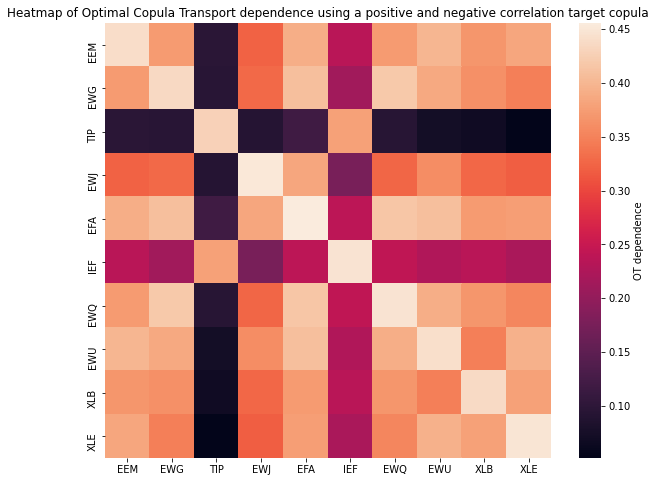

In [14]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ot_matrix_positive_negative, ax = ax, cbar_kws={'label': 'OT dependence'})

ax.set_title('Heatmap of Optimal Copula Transport dependence using a positive and negative correlation target copula')
plt.show()

### Heatmap of Optimal Copula Transport dependence using a target copula with one element has extreme variations and the second has small variations

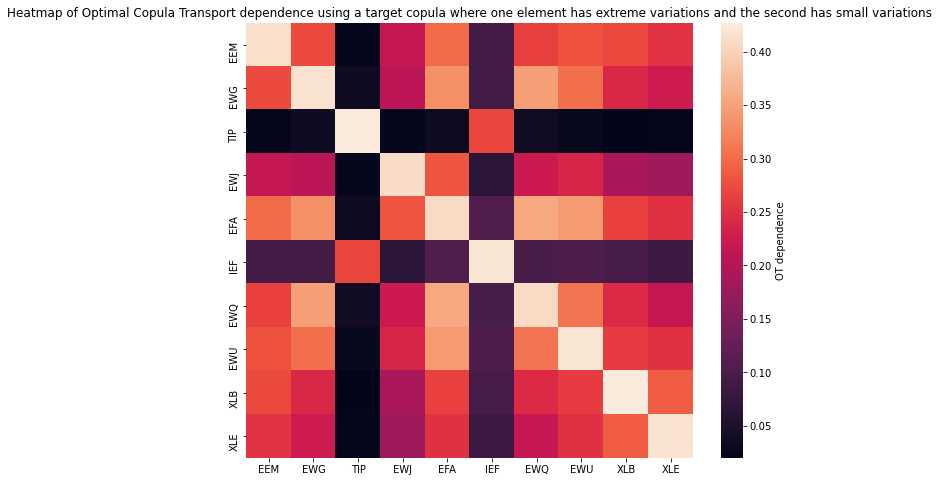

In [15]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ot_matrix_diffvar, ax = ax, cbar_kws={'label': 'OT dependence'})

ax.set_title('Heatmap of Optimal Copula Transport dependence using a target copula where one element has extreme variations and the second has small variations')
plt.show()

### Heatmap of Optimal Copula Transport dependence using a Gaussian target copula with elements being positively correlated for small variations but uncorrelated otherwise

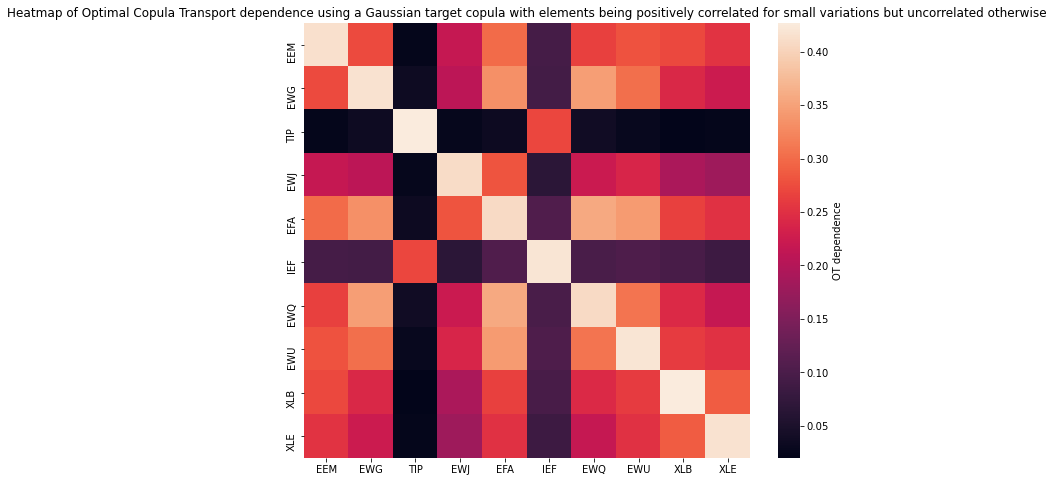

In [16]:
# Plotting the heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(ot_matrix_diffvar, ax = ax, cbar_kws={'label': 'OT dependence'})

ax.set_title('Heatmap of Optimal Copula Transport dependence using a Gaussian target copula with elements being positively correlated for small variations but uncorrelated otherwise')
plt.show()

As seen from the heat maps of OT dependence matrices, various target copulas used in measures are showing specific characteristics of the assets. These measures can help uncover and better analyze relationships between assets.

---

## Conclusion

This notebook describes the Optimal Copula Transport dependence measure and how it may be used in real-life applications.  

This dependence measure was described by _Marti et al._ in the work __“Exploring and measuring non-linear correlations: Copulas, Lightspeed Transportation and Clustering.”__  [available here](https://arxiv.org/pdf/1610.09659.pdf).

Key takeaways from the notebook:
- Optimal Copula Transport dependence allows to measure distance between random elements in relation to different target copulas.
- Optimal Copula Transport dependence is computationally heavy, so it may take some time to calculate the whole codependence matrix.
- Supported target copulas allow to answer the following questions:
  - “Which pair of assets having ρ=0.7 correlation has the nearest copula to the Gaussian one?”
  - “Which pairs of assets are both positively and negatively correlated?”
  - “Which assets occur extreme variations while those of others are relatively small, and conversely?”
  - “Which pairs of assets are positively correlated for small variations but uncorrelated otherwise?”
- Results show that this dependence measure can help uncover dependency types of a given set of elements.


## Reference

1. Marti, Gautier & Andler, Sébastien & Nielsen, Frank & Donnat, Philippe. (2016). Exploring and measuring non-linear correlations: Copulas, Lightspeed Transportation and Clustering.      Available at: https://arxiv.org/pdf/1610.09659.pdf

2. Gautier Marti. (2020) Blog post: Measuring non-linear dependence with Optimal Transport. Available at: https://gmarti.gitlab.io/qfin/2020/06/25/copula-optimal-transport-dependence.html